In [1]:
from my_functions import *

#Main Libraries 
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import datetime
import scipy.fftpack
import tensorflow as tf
from tensorflow import keras # And the tf and keras framework, thanks to Google
import scipy.io as io
import sys, os, time
import math
from scipy.fft import fft, fftfreq #Fourier
import pywt # Wavelet

from skimage.restoration import denoise_wavelet #Noise
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.manifold import TSNE
import time
from tensorflow.python.framework import ops
import networkx as nx #Graph

#Extra Libraries 
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm
from scipy.spatial.distance import pdist, squareform
import random
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns #I used sns.distplot because it has more manual properties than plt.hist()
from scipy.stats import pearsonr #includes the PCC function

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 6: 0, 7: 0, 8: 0, 9: 0}


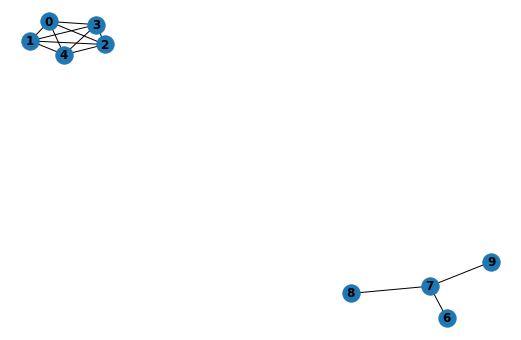

In [80]:
Gt = nx.complete_graph(5)
Gt.add_node(6)
Gt.add_node(7)
Gt.add_node(8)
#Gt.add_edge(6, 2)
#Gt.add_edge(7, 2)
Gt.add_edge(6, 7)
Gt.add_edge(8, 7)
#print(nx.clustering(Gt, 0))
Gt.add_node(9)
Gt.add_edge(7, 9)
print(nx.clustering(Gt))

plt.figure(figsize=(20,6))
plt.subplot(121)
nx.draw(Gt, with_labels=True, font_weight='bold')

# We have to set the population attribute for each of the 14 nodes
for i in list(Gt.nodes()):
    Gt.nodes[i]['degree'] =  Gt.degree[i]

In [83]:
print(Gt.nodes)

[0, 1, 2, 3, 4, 6, 7, 8, 9]


In [62]:
['rescale_layout',
 'random_layout',
 'shell_layout',
 'fruchterman_reingold_layout',
 'spectral_layout',
 'kamada_kawai_layout',
 'spring_layout',
 'circular_layout']

{0: 4486679, 1: 11007835, 2: 12442373, 3: 957352, 4: 8436675, 5: 3124458, 6: 6809970, 7: 4681087, 8: 460468, 9: 837737, 10: 1198491, 11: 4467797, 12: 40017, 13: 961587}
{0: 1, 1: 11007835, 2: 12442373, 3: 957352, 4: 8436675, 5: 3124458, 6: 6809970, 7: 4681087, 8: 460468, 9: 837737, 10: 1198491, 11: 4467797, 12: 40017, 13: 961587}


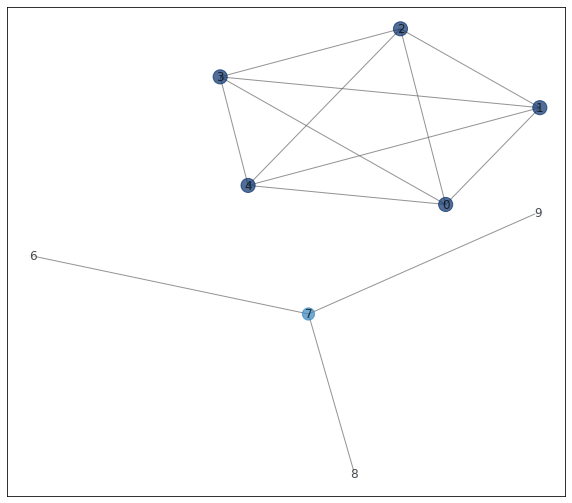

In [86]:
node_color = [Gt.degree(v) for v in Gt]
node_size = [50.0 * nx.get_node_attributes(Gt, 'degree')[v] for v in Gt]

plt.figure(figsize =(10, 9))
pos = nx.kamada_kawai_layout(Gt)

nx.draw_networkx(Gt, pos, node_size = node_size, 
				node_color = node_color, alpha = 0.7,
				with_labels = True, 
				edge_color ='.4', cmap = plt.cm.Blues)



In [46]:
# returns list of nodes in different connected components
gtl = list(nx.connected_components(Gt))
print(len(gtl))
gtl0 = gtl[0]
print(list(gtl0))

2
[0, 1, 2, 3, 4]


In [37]:
print(len(list(Gt.edges)))

15


In [31]:
# returns number of nodes to be removed
# so that Graph becomes disconnected
for i in list(Gt.nodes):
    print(nx.edge_connectivity(Gt,2,6))

2
2
2
2
2
2
2
2
2


In [36]:
betweenness_dict = nx.betweenness_centrality(Gt) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(Gt) # Run eigenvector centrality

print(betweenness_dict)
#print(eigenvector_dict)

{0: 0.0, 1: 0.0, 2: 0.6785714285714285, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.25, 8: 0.0, 9: 0.0}


In [35]:
print(betweenness_dict[2])

0.6785714285714285


average_node_connectivity(G[, flow_func])
Returns the average connectivity of a graph G.

all_pairs_node_connectivity(G[, nbunch, …])
Compute node connectivity between all pairs of nodes of G.

edge_connectivity(G[, s, t, flow_func, cutoff])
Returns the edge connectivity of the graph or digraph G.

local_edge_connectivity(G, s, t[, …])
Returns local edge connectivity for nodes s and t in G.

local_node_connectivity(G, s, t[, …])
Computes local node connectivity for nodes s and t.

node_connectivity(G[, s, t, flow_func])
Returns node connectivity for a graph or digraph G.

In [ ]:
# returns True or False whether Graph is connected
print(nx.is_connected(Gt))
  
# returns number of different connected components
print(nx.number_connected_components(G))
  
# returns list of nodes in different connected components
print(list(nx.connected_components(G)))
  
# returns list of nodes of component containing given node 
print(nx.node_connected_component(G, 'I'))
  
# returns number of nodes to be removed
# so that Graph becomes disconnected
print(nx.node_connectivity(G))
  
# returns number of edges to be removed
# so that Graph becomes disconnected
print(nx.edge_connectivity(G))